## IMPLEMENTING MACHINE LEARNING TECHNIQUES FOR CANCER PROGNOSIS
---

**Group members: Kaushal Chaudhary, Gauresh Chavan, Mohit Ruke**

__ABSTRACT__

This research project presents an application of three machine learning (ML) algorithms: Logistic Regression on the Wisconsin Diagnostic Breast Cancer (WDBC) , Extra Tree Classifier on Wisconsin Prognostic Breast Cancer (WPBCC) dataset and Support Vector Classifier (SVC) on WPBC by measuring their classification test accuracy, and their sensitivity and specificity values. 

__INTRODUCTION__

Breast Cancer is the most common form of cancer in women, affecting almost 12% of all women across the world. In recent years, the incidence rate keeps increasing and data show that the survival rate is 88% after first five years from diagnosis and 80% after 10 years from diagnosis. Early prediction of cancer is one of the most crucial steps in the follow-up process [3]. Over past few decades, scientists applied different methods, such as screening in early stage, so that types of cancer can be identifies before their symptoms. With advent of new technologies, a large amounts of cancer data are available to the research community. However, an accurate prediction of a disease outcome is still one of the challenging tasks for the researchers and physicians around the world [2]. In this paper, we will develop, using machine learning techniques, methods that will allow accurate prognosis of cancer. 

Today, despite the many advances in early detection of diseases, cancer patients have a poor prognosis and the survival rates in them are low [1]. In cancer prediction/prognosis one is concerned with the following [4]: 

> 1) classification of tumor type

> 2) prediction of cancer recurrence and 

> 3) prediction of cancer survivability. 

In the first case, one is trying to predict the type of tumor (malign or benign) prior to the occurrence of the disease. In the second case one is trying to predict the likelihood of redeveloping cancer. In the third case one is trying to predict an outcome (life expectancy, survivability, progression, tumor-drug sensitivity) after the diagnosis of the disease. In the latter two situations the success of the prognostic prediction is obviously dependent on the success or quality of the diagnosis [4].

__DATA SOURCES__

[Classification of Tumor](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

[Cancer Recurrence and Survivability](ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WPBCC/) 




## PART A: CLASSIFICATION OF TUMOR 
---

**Importing useful packages**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Reading data from CSV**

In [2]:
cancer = pd.read_csv("cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
cancer.shape

(569, 32)

In [5]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


The **diagnosis** column in our data contains string values which needs to be converted into binary integer values our logistic model to process. If the tumor is malignant, result = 1 else 0

In [7]:
def converter(result):
    if result=='M':
        return 1
    else:
        return 0

In [8]:
cancer['result'] = cancer['diagnosis'].apply(converter)

In [9]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,result
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [10]:
from sklearn.model_selection import train_test_split

X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### TPOT:

Credits:[Randal Olson TPOT](http://www.randalolson.com/2015/11/15/introducing-tpot-the-data-science-assistant/)

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.
TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for our data.Once TPOT is finished searching, it provides us with the Python code for the best pipeline it found so you can tinker with the pipeline from there.

In [11]:
from tpot import TPOTClassifier
from sklearn.feature_selection import RFE

C:\Users\chava\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\chava\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [12]:
tpot = TPOTClassifier(generations=10, population_size=10, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

C:\Users\chava\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Generation 1 - Current best internal CV score: 0.9649960931395529


Generation 2 - Current best internal CV score: 0.9700277387091732


Generation 3 - Current best internal CV score: 0.9700277387091732


Generation 4 - Current best internal CV score: 0.9700277387091732


Generation 5 - Current best internal CV score: 0.9700277387091732


Generation 6 - Current best internal CV score: 0.9700277387091732


Generation 7 - Current best internal CV score: 0.9700277387091732


Generation 8 - Current best internal CV score: 0.9700277387091732


Generation 9 - Current best internal CV score: 0.9749027191748711


Generation 10 - Current best internal CV score: 0.9749027191748711



Best pipeline: LogisticRegression(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.8, min_samples_leaf=8, min_samples_split=13, n_estimators=100), C=15.0, dual=False, penalty=l2)
0.947368421053


### LOGISTIC REGRESSION
---

In [13]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

log_reg = linear_model.LogisticRegressionCV()
log_reg.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [14]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.977
Accuracy on the test subset: 0.947


**Regularization**

We will be using L2 (ridge) regularization that comes default with the LogisticRegression() from Scikit-Learn and. We will play along with C value - a parameter to control the strength of regularization and see if Regularization helps our model.

- Higher C : correct classification of each data point
- Lower C: Logmodel adjusts to the majority of the data point

In [15]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.980
Accuracy on the test subset: 0.959


In [16]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.942
Accuracy on the test subset: 0.918


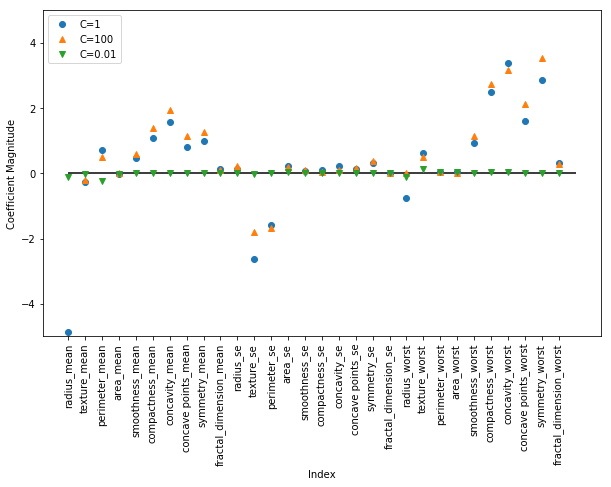

In [18]:
plt.figure(figsize=(10,6))
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(X.shape[1]), X, rotation=90)
plt.hlines(0,0, X.shape[1])
plt.ylim(-5,5)
plt.xlabel('Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

In [19]:
print ("---Logistic Model---")
log_roc_auc001 = roc_auc_score(y_test, log_reg001.predict(X_test))
print ("Logistic_001 AUC: ", log_roc_auc001 )
print(classification_report(y_test,log_reg001.predict(X_test)))

print ("---Logistic Model---")
log_roc_auc100 = roc_auc_score(y_test, log_reg100.predict(X_test))
print ("Logistic_100 AUC: ", log_roc_auc100 )
print(classification_report(y_test,log_reg100.predict(X_test)))

print ("---Logistic Model---")
log_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ("Logistic AUC: ", log_roc_auc )
print(classification_report(y_test,log_reg.predict(X_test)))

---Logistic Model---
Logistic_001 AUC:  0.908008658009
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       105
          1       0.92      0.86      0.89        66

avg / total       0.92      0.92      0.92       171

---Logistic Model---
Logistic_100 AUC:  0.949783549784
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       105
          1       0.98      0.91      0.94        66

avg / total       0.96      0.96      0.96       171

---Logistic Model---
Logistic AUC:  0.94025974026
             precision    recall  f1-score   support

          0       0.94      0.97      0.96       105
          1       0.95      0.91      0.93        66

avg / total       0.95      0.95      0.95       171



**Evaluation: Plotting ROC curve**

What is ROC?

The ROC curve is a fundamental tool for diagnostic test evaluation.

In a ROC curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points of a parameter. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. The area under the ROC curve (AUC) is a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal).

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr100, tpr100, thresholds100 = roc_curve(y_test, log_reg100.predict_proba(X_test)[:,1])
fpr001, tpr001, thresholds001 = roc_curve(y_test, log_reg001.predict_proba(X_test)[:,1])

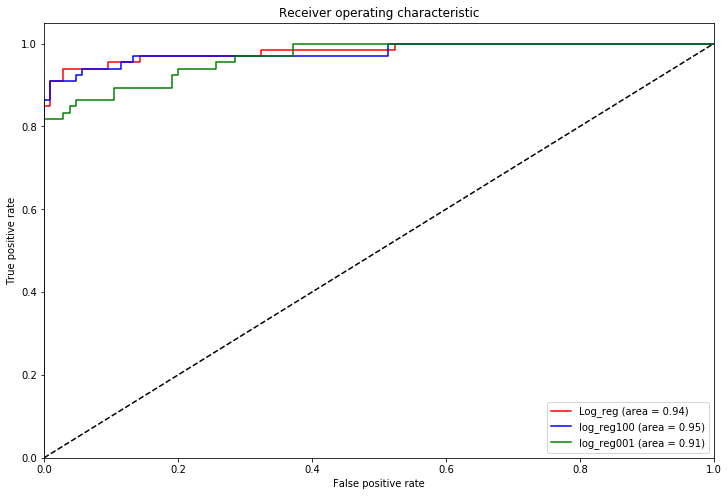

In [21]:
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label ="Log_reg (area = %0.2f)" % log_roc_auc, color ="red")
plt.plot(fpr100, tpr100, label ="log_reg100 (area = %0.2f)" % log_roc_auc100, color ="blue")
plt.plot(fpr001, tpr001, label ="log_reg001 (area = %0.2f)" % log_roc_auc001, color ="green")
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

From the figure above, it is quite clear that with greater 'C' parameter, accuracy is much better. 

## PART B - PREDICTION OF CANCER RECURRENCE
---

Dataset : Wisconsin Prognostic Breast Cancer Dataset

**Attribute Information**

    1) ID number
    2) Outcome (R = recur, N = nonrecur)
    3) Time (recurrence time if field 2 = R, disease-free time if 
	field 2	= N)
    4-33) Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


**Importing useful packages**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
## importing the dataset
dataset = pd.read_csv("wpbc_data.csv")
dataset.head(10)

,id,recurance,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


In [24]:
a=dataset['Lymph node status'].replace('?',0)
b=a.astype(int)

In [25]:
data=dataset.drop('Lymph node status',axis=1)
data.head()

,id,recurance,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor size
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


Converting catagorical variable into binary values for analysis.

In [27]:
def converter(result):
    if result=='R':
        return 1
    else:
        return 0

Dataset is filtered to reflect a particular endpoint; e.g., recurrences before 24 months = positive (1), nonrecurrence beyond 24 months = negative (0).

In [28]:
def converter_1(v1,v2):
    if v1==1:
        if v2<24:
            return v2
        else:
            return v2
    else:
        if v2>24:
            return 0
        else:
            return v2

In [29]:
data['recurance'] = dataset['recurance'].apply(converter)

data['time']=data.apply(lambda data:converter_1(data['recurance'],data['time']),axis=1)

In [30]:
df=pd.concat([data,b],axis=1)
df.head(15)

,id,recurance,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor size,Lymph node status
0,119513,0,0.0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,0.0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
5,843786,1,77.0,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
6,844359,0,0.0,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.19220,0.2726,0.09581,1.5,0
7,844582,1,77.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10
8,844981,0,0.0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1
9,845010,0,0.0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20


In [31]:
df.columns

Index(['id', 'recurance', 'time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Tumor size', 'Lymph node status'],
      dtype='object')

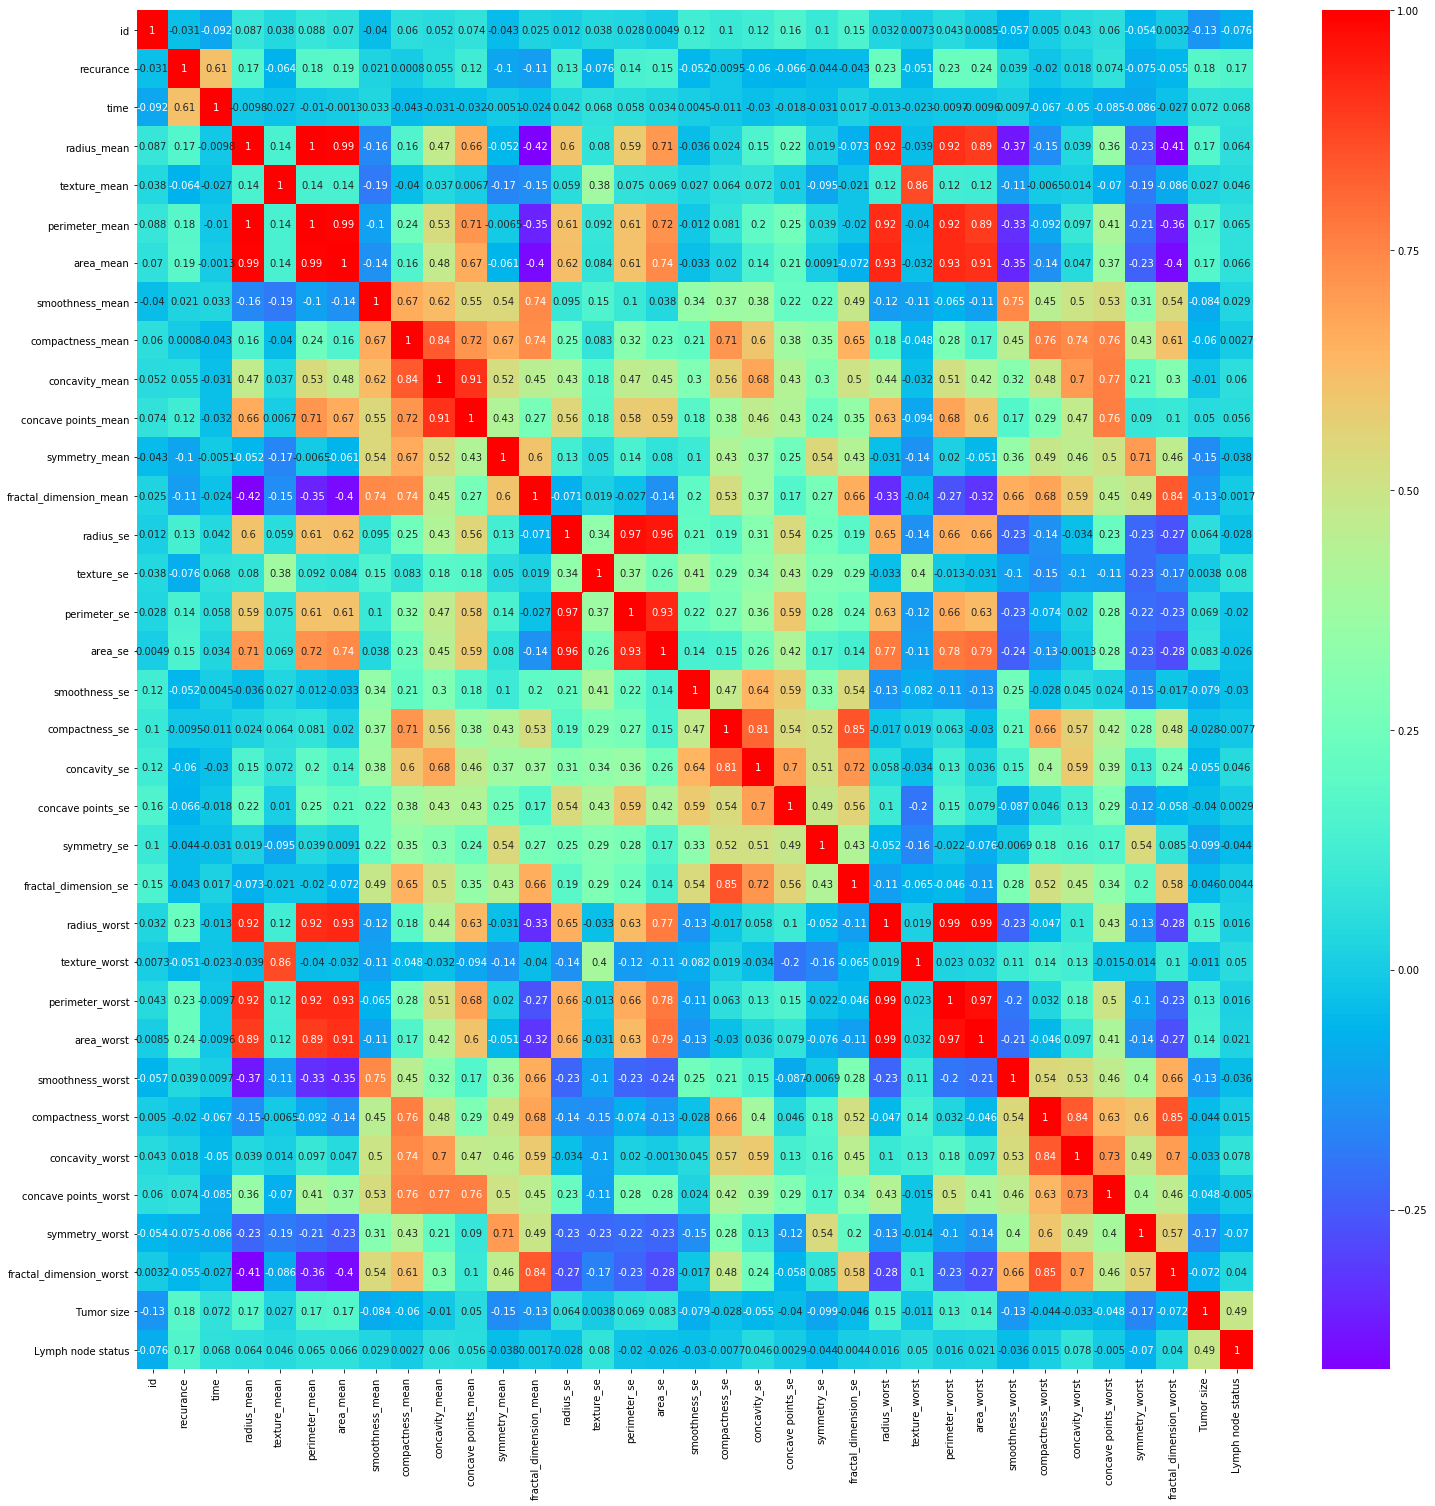

In [40]:
sns.heatmap(df.corr(),cmap="rainbow",annot=True)
plt.figure(figsize = (30,30))

Categorizing data into three sections to for plotting purposes.

In [36]:
pp1=data[['time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean','recurance']]
pp2=data[['time','radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se','recurance']]
pp3=data[['time','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst','recurance']]

Text(0.5,1,'Mean')

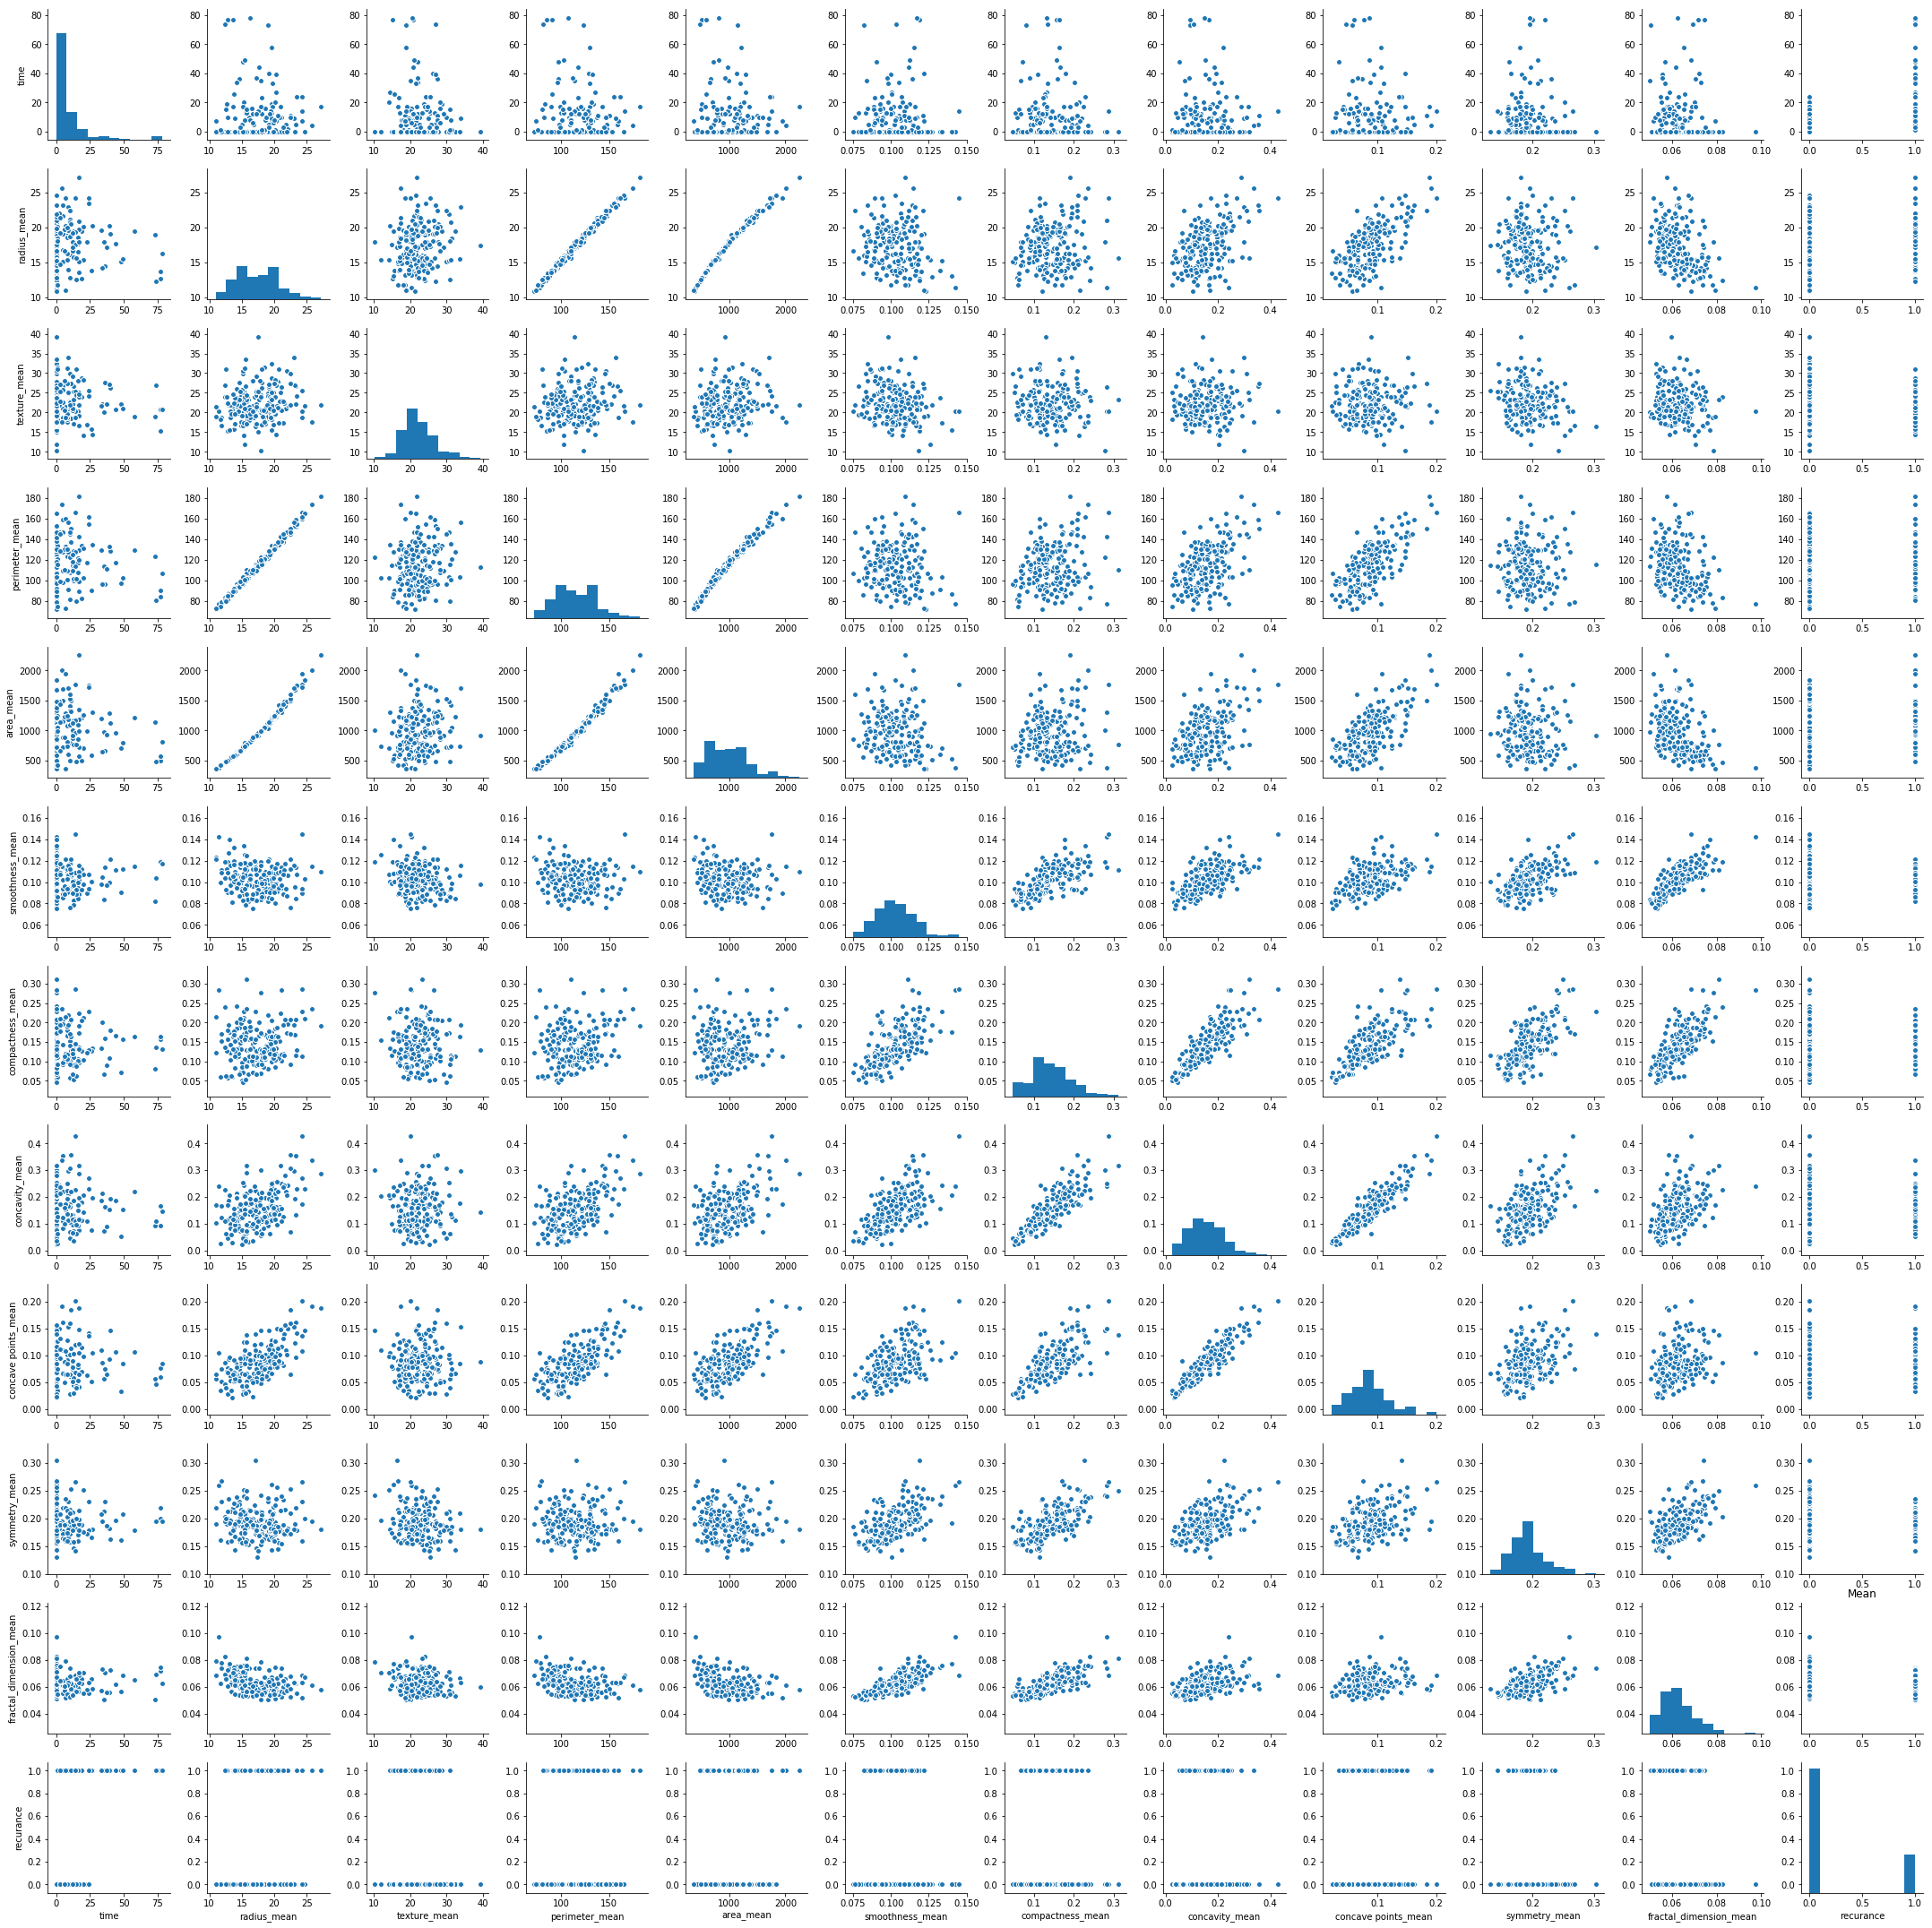

In [37]:
sns.pairplot(pp1)
plt.title('Mean')

Text(0.5,1,'Standard Error')

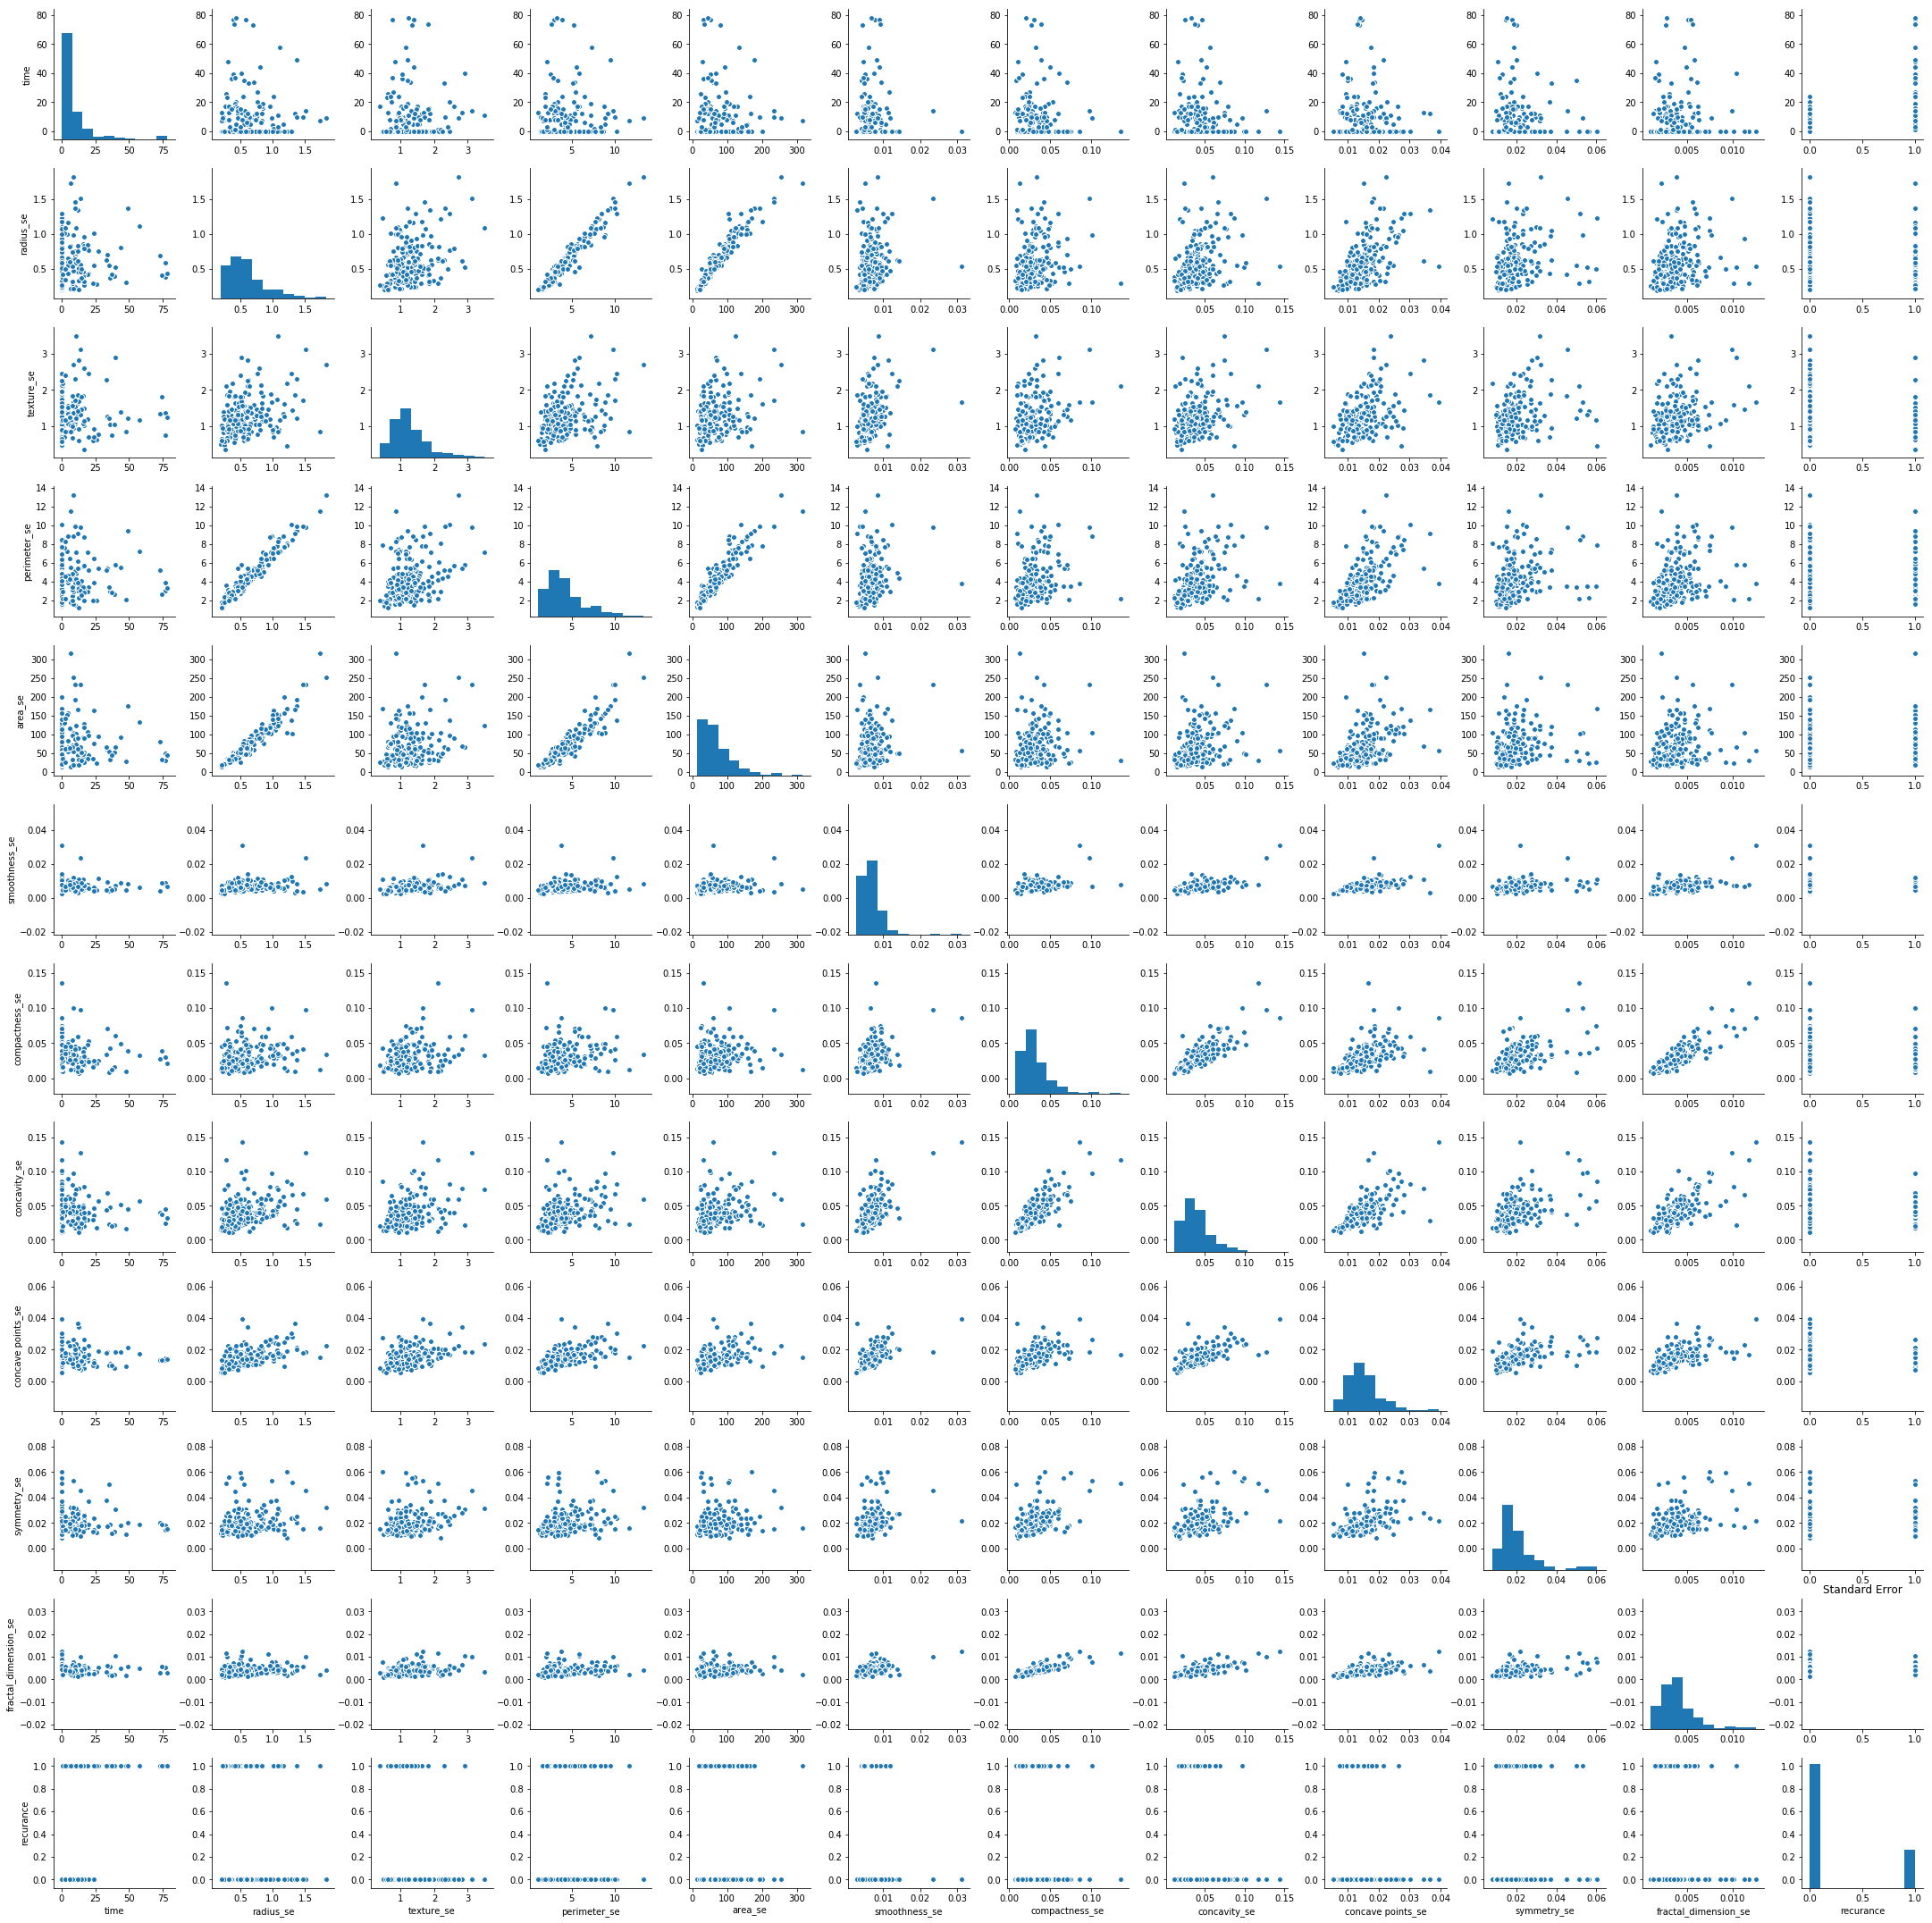

In [38]:
sns.pairplot(pp2)
plt.title('Standard Error')

Text(0.5,1,'Worst')

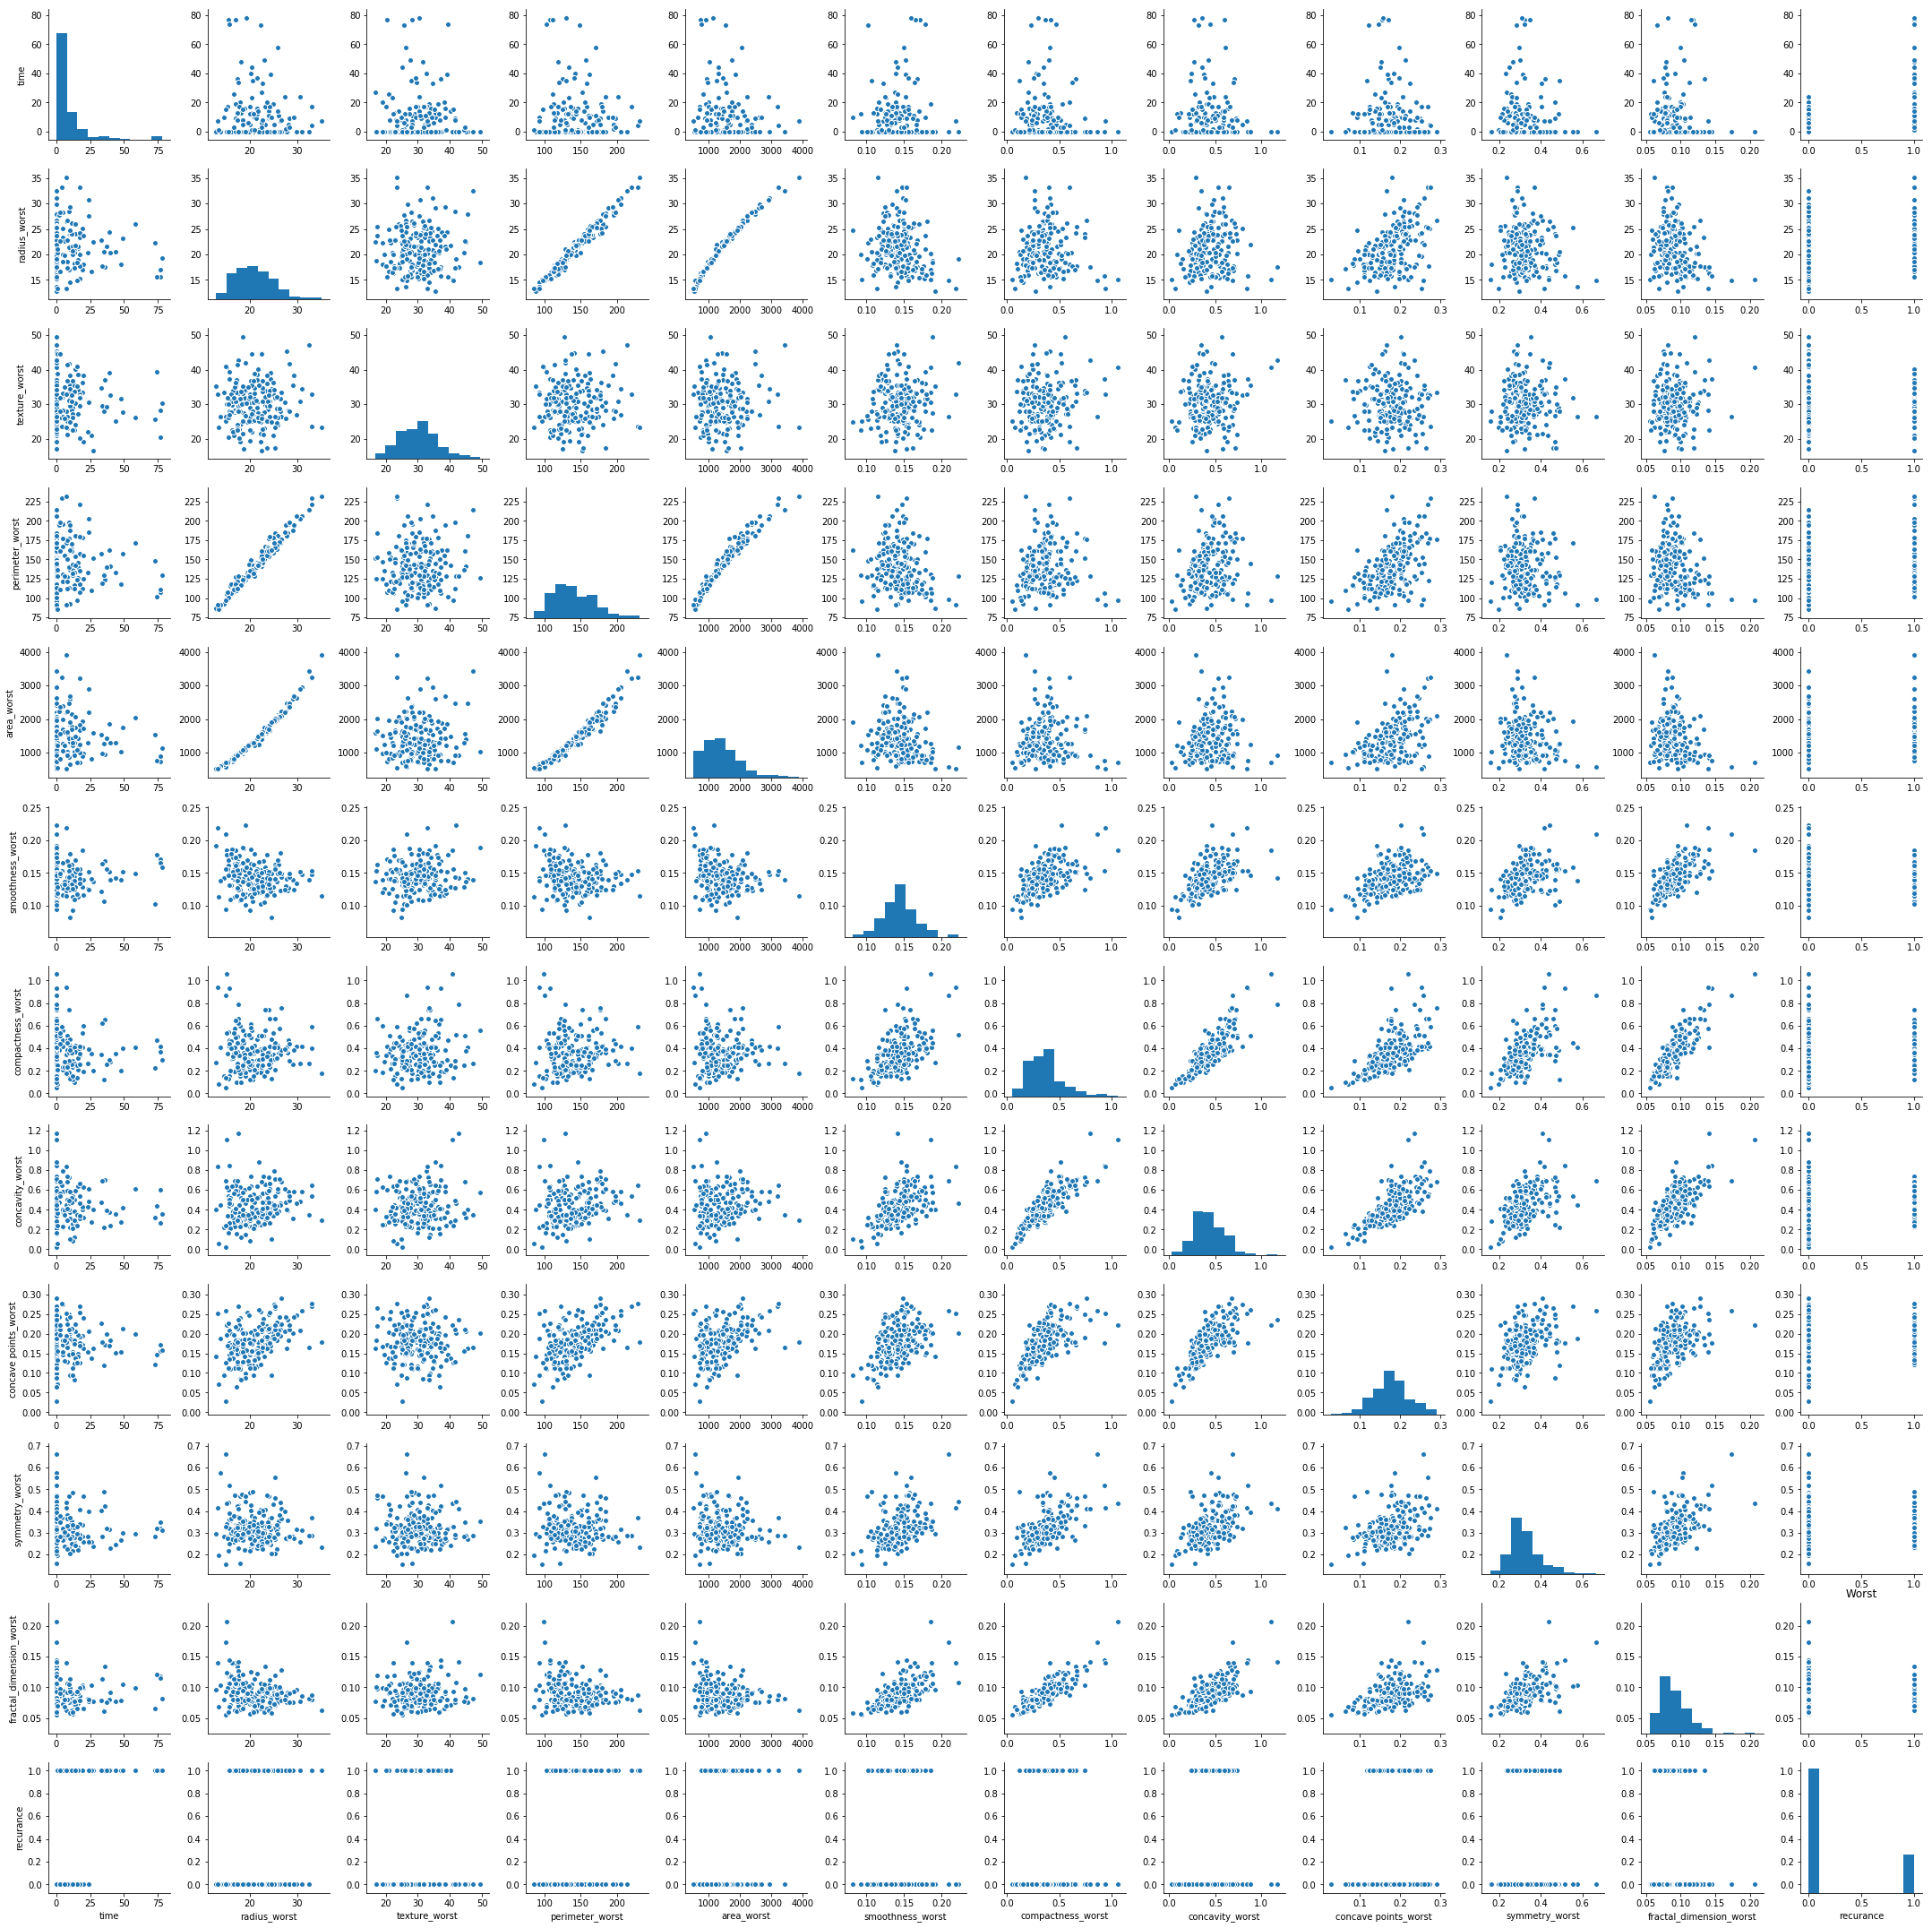

In [39]:
sns.pairplot(pp3)
plt.title('Worst')

## APPROACH

We have 33 features in our dataset.To determine the best accuracy that is to determine the recurance or non-recurance of the cancer depending on the parameters of the tumor.
If we select all the features, we might end up in overfitting the data model which we want to neglect. By using Recursive Feature Engineering Model (RFE) we will take only 10 best features which the model will determine and based on the result we will fit the model.
The Target Variable has 2 outcomes, 'R' for recurance and 'N' for non-recurance. Since the Target variable is in String, we need to convert the values into boolean. In the 'time' feature, we have values for nonrecurance more than 24 months which we can say that the the possibility on recurance of cancer is less likely. Hence we converted that value to 0 and Hence made our dataset for further processing.

In [41]:
X = df[['time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Tumor size','Lymph node status']]
Y = df['recurance']
print(X.shape,'X')
print(Y.shape,'Y')

(198, 33) X
(198,) Y


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### TPOT

In [50]:
from tpot import TPOTClassifier
from sklearn.feature_selection import RFE

In [53]:
tpot = TPOTClassifier(generations=10, population_size=10, verbosity=2)
tpot.fit(X_train, Y_train)
print(tpot.score(X_test, Y_test))

Generation 1 - Current best internal CV score: 0.8854594330400782


Generation 2 - Current best internal CV score: 0.8854594330400782


Generation 3 - Current best internal CV score: 0.8854594330400782


Generation 4 - Current best internal CV score: 0.8854594330400782


Generation 5 - Current best internal CV score: 0.8854594330400782


Generation 6 - Current best internal CV score: 0.8854594330400782


Generation 7 - Current best internal CV score: 0.8854594330400782


Generation 8 - Current best internal CV score: 0.8854594330400782


Generation 9 - Current best internal CV score: 0.8854594330400782


Generation 10 - Current best internal CV score: 0.8860520527859238



Best pipeline: LinearSVC(GaussianNB(input_matrix), C=0.001, dual=True, loss=squared_hinge, penalty=l2, tol=0.01)
0.75


Here, The best pipeline for this dataset is LinearSVC model which may give an accuracy of 82.5 perfcent by selecting the proper tuning parameters.

## LINEAR SVC
---

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.

### Unscaled:

In [55]:
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

In [56]:
X = df[['time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Tumor size','Lymph node status']]
Y = df['recurance']
print(X.shape,'X')
print(Y.shape,'Y')

(198, 33) X
(198,) Y


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state=0)

svc = LinearSVC(C=25.0, dual=True, loss='squared_hinge', penalty='l2', tol=1e-05)
svc.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svc.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svc.score(X_test, y_test)))

The accuracy on the training subset: 0.877
The accuracy on the test subset: 0.850


In [58]:
predictions = svc.predict(X_test)

In [59]:
print(confusion_matrix(y_test,predictions))

[[40  4]
 [ 5 11]]


__True Positives: 40__

__True Negatives: 11__

In [60]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90        44
          1       0.73      0.69      0.71        16

avg / total       0.85      0.85      0.85        60



From the above confusion matrix, we can infer that our current model is able to predict True positives and True negatives and since we got an accuracy of 81% there are some False positives and false negatives which we want to reduce by selecting the important features and trying to tune the model further. More about [RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) 

### RECURSIVE FEATURE ENGINEERING

In [62]:
rfe = RFE(svc, n_features_to_select=10)
rfe.fit(X,Y)

RFE(estimator=LinearSVC(C=25.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
     verbose=0),
  n_features_to_select=10, step=1, verbose=0)

In [63]:
rfe.ranking_

array([ 1,  1,  1,  1,  7, 17, 23, 14,  9,  6, 11,  4,  1,  1,  2, 20, 12,
       24, 18, 19, 21, 10,  1,  1,  3, 15,  8, 13, 22,  5, 16,  1,  1])

In [64]:
S=rfe.transform(X)
Y=df['recurance']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(S, Y, test_size=0.3, random_state=101)

svc =LinearSVC(C=25.0, dual=False, loss='squared_hinge', penalty='l2', tol=1e-05)
svc.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svc.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svc.score(X_test, y_test)))

The accuracy on the training subset: 0.899
The accuracy on the test subset: 0.850


__NEED FOR SCALING...__

Following plot shows the difference in minimum and maximum magnitude of the features selected.

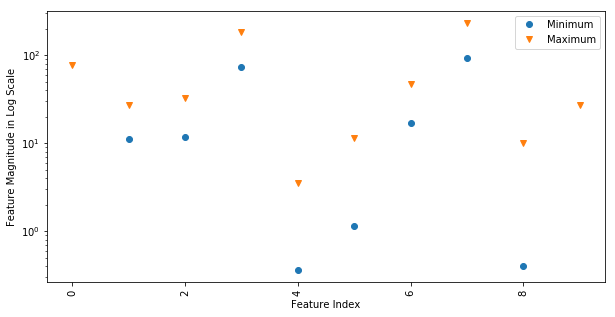

In [66]:
plt.figure(figsize=(10,5))
plt.plot(X_train.min(axis=0), 'o', label='Minimum')
plt.plot(X_train.max(axis=0), 'v', label='Maximum')
#plt.xticks(range(X.shape[1]), X, rotation=90)
#plt.hlines(0,0, X.shape[1])
#plt.ylim(-5,5)
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

Scaling Train data...

In [67]:
#Finding the minimum values for each feature
min_train = X_train.min(axis=0)
#Finding the range of each feature
range_train = (X_train - min_train).max(axis=0)
#Scaling the features between the the range 0 to 1 
X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum per feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Scaling Test Data...

In [68]:
X_test_scaled = (X_test - min_train)/range_train

svc1 = LinearSVC(C=25.0, dual=False, loss='squared_hinge', penalty='l2', tol=1e-05)
svc1.fit(X_train_scaled, y_train)

LinearSVC(C=25.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
     verbose=0)

### Scaled SVC:

In [70]:
print('The accuracy on the training subset: {:.3f}'.format(svc1.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svc1.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.891
The accuracy on the test subset: 0.867


In [71]:
prediction = svc1.predict(X_test_scaled)

In [72]:
print(confusion_matrix(y_test,prediction))

[[43  3]
 [ 5  9]]


We can see that we have been successful in increasing the true positives along with decreasing alse negatives.

In [73]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.90      0.93      0.91        46
          1       0.75      0.64      0.69        14

avg / total       0.86      0.87      0.86        60



### GridSearch:

Exhaustive search over specified parameter values for an estimator. GridSearchCV implements a “fit” method and a “predict” method like any classifier except that the parameters of the classifier used to predict is optimized by cross-validation.

In [74]:
param_grid = {'C': [0.1,1, 10, 100, 1000]} 

In [75]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(C=25.0, dual=False, loss='squared_hinge', penalty='l2', tol=1e-05),param_grid,refit=True,verbose=3)

In [76]:
#Fiting our model based on the hyper-parametres and the classifier selected
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.8260869565217391, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.8043478260869565, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.8260869565217391, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.8695652173913043, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.8043478260869565, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9130434782608695, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.8695652173913043, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.8260869565217391, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.8913043478260869, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=25.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

In [77]:
#Finding the best hyper-parametres for our model depening upon the dataset
grid.best_params_

{'C': 1}

In [78]:
grid.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
     verbose=0)

In [79]:
g_prediction = grid.predict(X_test_scaled)

In [80]:
print(confusion_matrix(y_test,g_prediction))

[[45  1]
 [ 5  9]]


The number of true positives have increased and false negatives have decreased which is a good sign.

In [81]:
print(classification_report(y_test,g_prediction))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94        46
          1       0.90      0.64      0.75        14

avg / total       0.90      0.90      0.89        60



 ### Evaluation:
 
 We perform evaluation by plotting the AUC curve.

In [82]:
log_roc_auc3 = roc_auc_score(y_test, grid.predict(X_test_scaled))
print ("GRID AUC: ", log_roc_auc3 )

log_roc_auc2 = roc_auc_score(y_test, svc.predict(X_test))
print ("Unscaled SVM AUC: ", log_roc_auc2 )

log_roc_auc1 = roc_auc_score(y_test, svc1.predict(X_test_scaled))
print ("Scaled SVM AUC: ", log_roc_auc1 )

GRID AUC:  0.810559006211
Unscaled SVM AUC:  0.777950310559
Scaled SVM AUC:  0.788819875776


In [83]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, grid.predict(X_test_scaled))
fpr2, tpr2, thresholds2 = roc_curve(y_test, svc.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, svc1.predict(X_test_scaled))

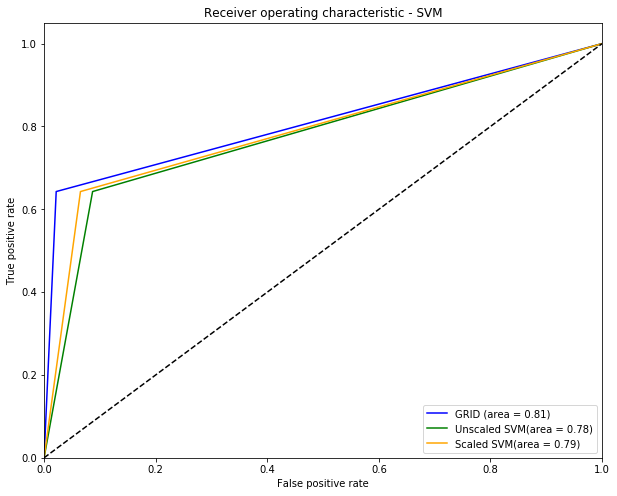

In [84]:
plt.figure(figsize = (10,8))
plt.plot(fpr3, tpr3, label ="GRID (area = %0.2f)" % log_roc_auc3, color ="blue")
plt.plot(fpr2, tpr2, label ="Unscaled SVM(area = %0.2f)" % log_roc_auc2, color ="green")
plt.plot(fpr1, tpr1, label ="Scaled SVM(area = %0.2f)" % log_roc_auc1, color ="orange")
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

From the plot, we can infer that GRID gives us the best accuracy.

## PART C - PREDICTION OF CANCER SURVIVAL

Dataset : Wisconsin Prognostic Breast Cancer Dataset

Glossary:
This file contains patients' nuclear features, survival time and chemotherapy 
information.  The 39 columns contain the following information:

* Patient's artificially created number i=1,......,253.
* 2.  code_a = 0 if non-recur
             = 1 if recur
* 3.  code_b = 0 if death is not caused by cancer or person leaves the group
		     = 1 if death is caused by cancer
* 4.  time_a = time (months) DFS/TTR 
		       DFS : Disease Free Survival (code a=0)
         	   TTR : Time To Recur (if code a=1)
* 5.  time_b = survival time (months) for patients who die, leave or survive the total time of the study 158 months at December 1997.
* 6.  radius
* 7.  texture
* 8.  perimeter
* 9.  area
* 10.  smoothness
* 11.  compactness
* 12.  concavity
* 13.  concave point
* 14.  symmetry
* 15.  fractal dimension
* 16. to 25. Standard devisation of 6. to 15. above
* 26. to 35. Largest (worst) of 6. to 15. above
* 36.  tumor size
* 37.  Q(i, 36) = Lymph node status 
	  (number of metastasized lymph nodes: 0 to 30)
* 38.   hormo = 1 if patient received first chemotherapy
			  = 0 otherwise
* 39.   chemo = 1 if patient received second chemotherapy
			  = 0 otherwise

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from time import time
%matplotlib inline

In [91]:
## importing the dataset
dataset = pd.read_csv("WPBCC.csv")
dataset.head()

,PATIENT,CODE_A,CODE_B,TIME_A,TIME_B,RADIUS,TEXTURE,PERIMETR,AREA,SMOOTH,...,WSMOOTH,WCOMPCT,WCONCV,WCONV_PT,WSYMM,WFRACT_D,SIZE,NODE_ALL,CHEMO,HORMO
0,1,0,0,55,55,18.02,27.60,117.50,1013.0,0.09489,...,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5,1,1
1,2,0,0,29,29,14.09,27.70,96.01,604.7,0.11860,...,0.1555,0.5988,0.7392,0.18710,0.2497,0.11830,0.8,0,0,0
2,3,0,0,53,53,13.32,27.25,85.99,551.7,0.08446,...,0.1197,0.3018,0.3039,0.11670,0.2859,0.08557,1.3,0,0,0
3,4,1,0,12,68,15.11,32.79,99.36,712.3,0.09656,...,0.1408,0.4667,0.6024,0.12780,0.2773,0.10450,2.5,0,0,0
4,5,0,0,56,56,13.99,36.52,92.27,598.3,0.11780,...,0.1613,0.2520,0.3125,0.09596,0.2154,0.07969,0.8,1,0,1


In [92]:
data = dataset[['PATIENT','CODE_B', 'CODE_A', 'TIME_A', 'TIME_B', 'RADIUS', 'TEXTURE',
       'PERIMETR', 'AREA', 'SMOOTH', 'COMPCT', 'CONCV', 'CONV_PT', 'SYMM',
       'FRACT_D', 'SRADIUS', 'STEXTURE', 'SPERIMET', 'SAREA', 'SSMOOTH',
       'SCOMPCT', 'SCONCV', 'SCONV_PT', 'SSYMM', 'SFRACT_D', 'WRADIUS',
       'WTEXTURE', 'WPERIMET', 'WAREA', 'WSMOOTH', 'WCOMPCT', 'WCONCV',
       'WCONV_PT', 'WSYMM', 'WFRACT_D', 'SIZE', 'NODE_ALL', 'CHEMO', 'HORMO']]
data.head()

,PATIENT,CODE_B,CODE_A,TIME_A,TIME_B,RADIUS,TEXTURE,PERIMETR,AREA,SMOOTH,...,WSMOOTH,WCOMPCT,WCONCV,WCONV_PT,WSYMM,WFRACT_D,SIZE,NODE_ALL,CHEMO,HORMO
0,1,0,0,55,55,18.02,27.60,117.50,1013.0,0.09489,...,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5,1,1
1,2,0,0,29,29,14.09,27.70,96.01,604.7,0.11860,...,0.1555,0.5988,0.7392,0.18710,0.2497,0.11830,0.8,0,0,0
2,3,0,0,53,53,13.32,27.25,85.99,551.7,0.08446,...,0.1197,0.3018,0.3039,0.11670,0.2859,0.08557,1.3,0,0,0
3,4,0,1,12,68,15.11,32.79,99.36,712.3,0.09656,...,0.1408,0.4667,0.6024,0.12780,0.2773,0.10450,2.5,0,0,0
4,5,0,0,56,56,13.99,36.52,92.27,598.3,0.11780,...,0.1613,0.2520,0.3125,0.09596,0.2154,0.07969,0.8,1,0,1


In [93]:
## X are the varibles used for predictions Y is the target
X = data.drop(['PATIENT','CODE_B'],axis=1)
Y = data['CODE_B']
X.head()

,CODE_A,TIME_A,TIME_B,RADIUS,TEXTURE,PERIMETR,AREA,SMOOTH,COMPCT,CONCV,...,WSMOOTH,WCOMPCT,WCONCV,WCONV_PT,WSYMM,WFRACT_D,SIZE,NODE_ALL,CHEMO,HORMO
0,0,55,55,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5,1,1
1,0,29,29,14.09,27.70,96.01,604.7,0.11860,0.25530,0.24860,...,0.1555,0.5988,0.7392,0.18710,0.2497,0.11830,0.8,0,0,0
2,0,53,53,13.32,27.25,85.99,551.7,0.08446,0.07879,0.05168,...,0.1197,0.3018,0.3039,0.11670,0.2859,0.08557,1.3,0,0,0
3,1,12,68,15.11,32.79,99.36,712.3,0.09656,0.12230,0.13380,...,0.1408,0.4667,0.6024,0.12780,0.2773,0.10450,2.5,0,0,0
4,0,56,56,13.99,36.52,92.27,598.3,0.11780,0.14060,0.10720,...,0.1613,0.2520,0.3125,0.09596,0.2154,0.07969,0.8,1,0,1


In [94]:
## Fitting the data in random forest algorithm by splitting it into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)


### TPOT

In [95]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [96]:
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2)
tpot.fit(X_train, Y_train)
print(tpot.score(X_test, Y_test))

Generation 1 - Current best internal CV score: 0.920462789243277


Generation 2 - Current best internal CV score: 0.920462789243277


Generation 3 - Current best internal CV score: 0.920462789243277


Generation 4 - Current best internal CV score: 0.9252188868042527


Generation 5 - Current best internal CV score: 0.9252188868042527


Generation 6 - Current best internal CV score: 0.9252188868042527


Generation 7 - Current best internal CV score: 0.9252188868042527


Generation 8 - Current best internal CV score: 0.9350906816760475


Generation 9 - Current best internal CV score: 0.9350906816760475


Generation 10 - Current best internal CV score: 0.9350906816760475



Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.4, min_samples_leaf=17, min_samples_split=15, n_estimators=100)
0.882352941176


In [97]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [98]:
etr = ExtraTreesClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
etr.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [99]:
print('Accuracy on the training subset: {:.3f}'.format(etr.score(X_train, Y_train)))
print('Accuracy on the test subset: {:.3f}'.format(etr.score(X_test, Y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.922


In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
predictions = etr.predict(X_test)

In [102]:
print(confusion_matrix(Y_test,predictions))

[[39  0]
 [ 4  8]]


In [103]:
Y_test

12     0
44     0
176    0
61     1
107    0
108    0
53     0
185    0
79     1
57     0
122    1
193    0
235    0
104    0
119    0
88     0
233    0
228    0
186    0
147    1
151    1
86     1
14     0
52     1
90     0
229    0
129    1
246    0
3      0
2      0
197    0
215    0
220    0
47     0
167    1
66     1
237    0
238    0
123    0
128    1
158    0
59     0
34     0
180    1
250    0
231    0
189    0
170    0
142    0
38     0
244    0
Name: CODE_B, dtype: int64

In [104]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

**Scaling data**

In [106]:
#Finding the minimum values for each feature
min_train = X_train.min(axis=0)
#Finding the range of each feature
range_train = (X_train - min_train).max(axis=0)
#Scaling the features between the the range 0 to 1 
X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
CODE_A      0.0
TIME_A      0.0
TIME_B      0.0
RADIUS      0.0
TEXTURE     0.0
PERIMETR    0.0
AREA        0.0
SMOOTH      0.0
COMPCT      0.0
CONCV       0.0
CONV_PT     0.0
SYMM        0.0
FRACT_D     0.0
SRADIUS     0.0
STEXTURE    0.0
SPERIMET    0.0
SAREA       0.0
SSMOOTH     0.0
SCOMPCT     0.0
SCONCV      0.0
SCONV_PT    0.0
SSYMM       0.0
SFRACT_D    0.0
WRADIUS     0.0
WTEXTURE    0.0
WPERIMET    0.0
WAREA       0.0
WSMOOTH     0.0
WCOMPCT     0.0
WCONCV      0.0
WCONV_PT    0.0
WSYMM       0.0
WFRACT_D    0.0
SIZE        0.0
NODE_ALL    0.0
CHEMO       0.0
HORMO       0.0
dtype: float64
Maximum per feature
CODE_A      1.0
TIME_A      1.0
TIME_B      1.0
RADIUS      1.0
TEXTURE     1.0
PERIMETR    1.0
AREA        1.0
SMOOTH      1.0
COMPCT      1.0
CONCV       1.0
CONV_PT     1.0
SYMM        1.0
FRACT_D     1.0
SRADIUS     1.0
STEXTURE    1.0
SPERIMET    1.0
SAREA       1.0
SSMOOTH     1.0
SCOMPCT     1.0
SCONCV      1.0
SCONV_PT    1.0
SSYMM       1.0
S

In [107]:
X_test_scaled = (X_test - min_train)/range_train

### Extremely Randomized Tree (Extra) Tree Classifier:

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. More about [Extra tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [108]:
etr1 = ExtraTreesClassifier()
etr1.fit(X_train_scaled,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [109]:
print('The accuracy on the training subset: {:.3f}'.format(etr1.score(X_train_scaled, Y_train)))
print('The accuracy on the test subset: {:.3f}'.format(etr1.score(X_test_scaled, Y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.941


In [110]:
s_prediction = etr1.predict(X_test_scaled)

In [111]:
print(confusion_matrix(Y_test,s_prediction))

[[39  0]
 [ 3  9]]


Clearly, we're facing overfitting problem. To avoid this, we perform feature engineering to select only important features that contribute towards prediction. More about [RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [113]:
from sklearn.feature_selection import RFE

rfe = RFE(etr, n_features_to_select=10)
rfe.fit(X,Y)


RFE(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [114]:
rfe.ranking_

array([ 1,  1,  1,  1,  1, 17, 28, 25, 26,  7,  6, 11,  3, 19, 14, 10,  1,
       21, 22, 24,  1, 12, 23,  1,  2,  1, 20, 27,  8,  5, 13, 16, 15,  1,
        9,  4, 18])

In [115]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False, False], dtype=bool)

### GridSearch:

In [116]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 
              'criterion': ['gini','entropy'], 'n_estimators':[1,5,10,15,20] } 

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
grid = GridSearchCV(ExtraTreesClassifier(),param_grid,refit=True,verbose=3)

In [119]:
#Fiting our model based on the hyper-parametres and the classifier selected
grid.fit(X_train,Y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] criterion=gini, max_features=auto, n_estimators=1 ...............
[CV]  criterion=gini, max_features=auto, n_estimators=1, score=0.8529411764705882, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=gini, max_features=auto, n_estimators=1 ...............
[CV]  criterion=gini, max_features=auto, n_estimators=1, score=0.7910447761194029, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=gini, max_features=auto, n_estimators=1 ...............
[CV]  criterion=gini, max_features=auto, n_estimators=1, score=0.8208955223880597, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=5 ...............
[CV]  criterion=gini, max_features=auto, n_estimators=5, score=0.8235294117647058, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=5 ...............
[CV]  criterion=gini, max_features=auto, n_estimators=5, score=0.7761194029850746, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=5 ...............
[CV]  criterion=gini, max_features=auto, n_estimators=5, score=0.8656716417910447, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, score=0.8382352941176471, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, score=0.8805970149253731, tota

[CV]  criterion=entropy, max_features=auto, n_estimators=5, score=0.8656716417910447, total=   0.0s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, score=0.8235294117647058, total=   0.0s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, score=0.8208955223880597, total=   0.0s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, score=0.8805970149253731, total=   0.0s
[CV] criterion=entropy, max_features=auto, n_estimators=15 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=15, score=0.8382352941176471, total=   0.0s
[CV] criterion=entropy, max_features=auto, n_estimators=15 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=15, score=0.835820895522388, total=   0.0s
[CV] criterion=entropy, max_features=auto

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'n_estimators': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [120]:
#Finding the best hyper-parametres for our model depening upon the dataset
grid.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}

In [121]:
grid.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [122]:
g_prediction = grid.predict(X_test)

In [123]:
print('Accuracy on the training subset: {:.3f}'.format(grid.score(X_train, Y_train)))
print('Accuracy on the test subset: {:.3f}'.format(grid.score(X_test, Y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.902


In [124]:
print(confusion_matrix(Y_test,g_prediction))

[[38  1]
 [ 4  8]]


In [125]:
from sklearn.cross_validation import cross_val_score
etr_cv = ExtraTreesClassifier()
scores = cross_val_score(etr_cv, X_test, Y_test, cv = 5)
scores

C:\Users\chava\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.81818182,  0.90909091,  1.        ,  1.        ,  0.88888889])

In [126]:
scores.mean()

0.92323232323232318

### RFE with CROSS VALIDATION

In [128]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
etr_rfecv = ExtraTreesClassifier() 
rfecv = RFECV(estimator=etr_rfecv, step=1, cv=8, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train_scaled, Y_train)



In [129]:
print('Optimal number of features :', rfecv.n_features_)


Optimal number of features : 1


In [130]:
print('Best features :', X_train_scaled.columns[rfecv.support_])

Best features : Index(['CODE_A'], dtype='object')


In [131]:
rfecv_prediction = rfecv.predict(X_test)

In [132]:
print('Accuracy on the training subset: {:.3f}'.format(rfecv.score(X_train, Y_train)))
print('Accuracy on the test subset: {:.3f}'.format(rfecv.score(X_test, Y_test)))

Accuracy on the training subset: 0.901
Accuracy on the test subset: 0.961


In [138]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.90      0.93      0.91        46
          1       0.75      0.64      0.69        14

avg / total       0.86      0.87      0.86        60



In [133]:
print(confusion_matrix(Y_test,rfecv_prediction))

[[37  2]
 [ 0 12]]


Increased True Negatives : 12

### Evaluation using roc score:

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report


In [135]:
log_roc_auc = roc_auc_score(Y_test, etr.predict(X_test))
print ("Unscaled ETR AUC: ", log_roc_auc )

Unscaled ETR AUC:  0.833333333333


In [136]:
fpr, tpr, thresholds = roc_curve(Y_test, etr.predict_proba(X_test)[:,1])

In [139]:
log_roc_auc2 = roc_auc_score(Y_test, etr1.predict(X_test_scaled))
print ("Scaled ETR AUC: ", log_roc_auc2 )
fpr2, tpr2, thresholds2 = roc_curve(Y_test, etr1.predict_proba(X_test_scaled)[:,1]) ##— Scaled AUC

Scaled ETR AUC:  0.875


In [140]:
log_roc_auc3 = roc_auc_score(Y_test, grid.predict(X_test_scaled))
print ("Scaled ETR AUC with GridSearch : ", log_roc_auc3 )
fpr3, tpr3, thresholds3 = roc_curve(Y_test, grid.predict_proba(X_test_scaled)[:,1]) ##— Scaled with gridSearch AUC

Scaled ETR AUC with GridSearch :  0.541666666667


In [141]:
log_roc_auc4 = roc_auc_score(Y_test, rfecv.predict(X_test_scaled))
print ("Scaled ETR AUC with RFECV : ", log_roc_auc4 )
fpr4, tpr4, thresholds4 = roc_curve(Y_test, rfecv.predict_proba(X_test_scaled)[:,1]) ##— Scaled with RFECV AUC

Scaled ETR AUC with RFECV :  0.974358974359


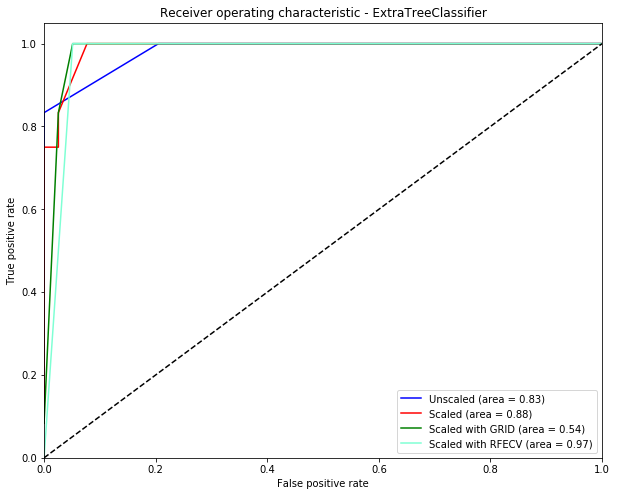

In [142]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label ="Unscaled (area = %0.2f)" % log_roc_auc, color ="blue")
plt.plot(fpr2, tpr2, label ="Scaled (area = %0.2f)" % log_roc_auc2, color ="red")
plt.plot(fpr3, tpr3, label ="Scaled with GRID (area = %0.2f)" % log_roc_auc3, color ="green")
plt.plot(fpr4, tpr4, label ="Scaled with RFECV (area = %0.2f)" % log_roc_auc4, color ="aquamarine")

plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic - ExtraTreeClassifier')
plt.legend(loc="lower right")
plt.show()

### SUMMARY:
---
The parameters considered in the experiments were as follows: (1) Train Accuracy, (2) Test Accuracy, (3) Precision (4) Recall , (5) f1-score, and (6) ROC score

| Parameter       | Logistic Regression | Linear SVC | Extra Tree Classifier with RFECV |
|-----------------|---------------------|------------|----------------------------------|
| Train Accuracy  |    0.977            |  0.877     |        0.901                     |
| Test Accuracy   |    0.944            |  0.817     |        0.961                     |
| Precision       |    0.95             |  0.81      |        0.86                      |
| Recall          |    0.95             |  0.82      |        0.87                      |
| f1-score        |    0.95             |  0.80      |        0.86                      |
| roc score       |    0.94             |  0.79      |        0.97                      |

__REFERENCES__

 > [1] [Azadeh Bashiri, Marjan Ghazisaeedi,* Reza Safdari, Leila Shahmoradi, and Hamide Ehtesham .Improving the Prediction of Survival in Cancer Patients by Using Machine Learning Techniques: Experience of Gene Expression Data: A Narrative Review](http://ijph.tums.ac.ir/index.php/ijph/article/view/9044)
 
 > [2] [Konstantina Kourou, Themis P. Exarchos, Konstantinos P. Exarchos, Michalis V. Karamouzis, Dimitros I. Fotiadis. Machine learning applications in cancer prognosis and prediction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4348437/)
 
 > [3] [Using Three Machine Learning Techniques for Predicting Breast Cancer Recurrence Ahmad LG*, Eshlaghy AT, Poorebrahimi A, Ebrahimi M and Razavi AR](https://www.omicsonline.org/using-three-machine-learning-techniques-for-predicting-breast-cancer-2157-7420.1000124.php?aid=13087)
 
 > [4] [Applications of Machine Learning in Cancer Prediction and Prognosis Joseph A. Cruz and David S. Wishart](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2675494/)
 
 > [5] [On Breast Cancer Detection: An Application of Machine Learning Algorithms on the Wisconsin Diagnostic Dataset Abien Fred M. Agarap](https://arxiv.org/pdf/1711.07831.pdf)
 
 > [6] http://www.randalolson.com/2016/05/08/tpot-a-python-tool-for-automating-data-science/

 > [7] https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

 > [8] ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/

 > [9] https://towardsdatascience.com/machine-learning-part-3-logistics-regression-9d890928680f

 > [10] https://orbi.uliege.be/handle/2268/9357

 > [11] https://github.com/CristiVlad25/ml-sklearn

The text in the document by Azadeh Bashiri, Marjan Ghazisaeedi, Reza Safdari, Leila Shahmoradi,  Hamide Ehtesham, Konstantina Kourou, Themis P. Exarchos, Konstantinos P. Exarchos, Michalis V. Karamouzis, Dimitros I. Fotiadis, Ahmad LG, Eshlaghy AT, Poorebrahimi A, Ebrahimi M, Razavi AR, Abien Fred, M. Agarap and Randall Olson is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by Cristi Vlad is licensed under the MIT License https://opensource.org/licenses/MIT